__Plots various thermodynamic quantities from the OUTPUT file obtained during DL-POLY simulation__
### Author: Rajendra Thapa
#### Lehigh University, Bethlehem, PA

In [66]:
import numpy as np
import matplotlib.pyplot as plt

#######################################################################
################# Get the plots #######################################
#######################################################################
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 75
plt.rcParams['axes.labelsize'] = 75
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.titlesize'] = 75
plt.rcParams['axes.titleweight']='normal'
plt.rcParams['xtick.labelsize'] =50
plt.rcParams['ytick.labelsize'] =50
plt.rcParams['lines.linewidth']=10.0
plt.rcParams['figure.figsize'] = 40,24
plt.rcParams['lines.markersize']=15
plt.rcParams['axes.linewidth'] =15

plt.rcParams['xtick.major.size']=30
plt.rcParams['xtick.direction']= 'in'
plt.rcParams['xtick.major.width']=10.0

plt.rcParams['ytick.major.size']=30
plt.rcParams['ytick.direction']= 'in'
plt.rcParams['ytick.major.width']=10.0

plt.rcParams['xtick.major.pad']='25'
plt.rcParams['ytick.major.pad']='25'


### Function Definitions

In [78]:
def get_tET(MQ_time):
    '''Inputs: MQ_time = name of the folder that contains multiple OUTPUT files from the melt-quench cycle.
        Output: array of steps, total energy and temperature in chronological order.'''
    t_E_T = []
    for MQ_steps in range(1,13):
        for run_type in ["nvt","nve"]:   # NVT was followed by NVE in the MQ cycle
            f_name = f"{MQ_time}/15A_W0-{MQ_steps}-{run_type}.out"
            with open(f_name) as file:
                lines = file.readlines()
            for ct in range(len(lines)-1):
                if lines[ct].startswith('------'):
                    next_line = lines[ct+1]
                    if "step" in next_line:
                        continue
                    elif next_line.startswith("------"):
                        continue
                    elif len(next_line.split())==10:
                        t_E_T.append(next_line.split()[:3])
# DL-POLY writes the averaged thermodynamic qty's over the entire cycle after the MD is done
# We don't want to include that because we are tracking the overall trajectory                
            t_E_T = t_E_T[:-1]
    return np.array([[float(num) for num in row] for row in t_E_T])
                        

def get_PE(MQ_time):
    '''Inputs: MQ_time = name of the folder that contains multiple OUTPUT files from the melt-quench cycle.
        Output: array of time elapsed in ps and potential energy in chronological order.'''
    t_PE = []
    for MQ_steps in range(1,13):
        for run_type in ["nvt","nve"]:
            f_name = f"{MQ_time}/15A_W0-{MQ_steps}-{run_type}.out"
            with open(f_name) as file:
                lines = file.readlines()
            for ct in range(len(lines)-2):
                if lines[ct].startswith('------'):
                    next_line = lines[ct+1]
                    next_next_line = lines[ct+2]
                    if "time(ps)" in next_next_line:
                        continue
                    elif next_line.startswith("------"):
                        continue
                    elif len(next_next_line.split())==10:
                        t_PE.append(next_next_line.split()[:2])
            t_PE = t_PE[:-1]
    return np.array([[float(num) for num in row] for row in t_PE])
                                

In [79]:
# 1p4ns, 1p54ns and 1p80ns are the MQ simulation of the same system with different times spent in 
# different section of the MQ
MQ_1p4 = get_tET("1p4ns")
MQ_1p54 = get_tET("1p54ns")
MQ_1p80 = get_tET("1p80ns")

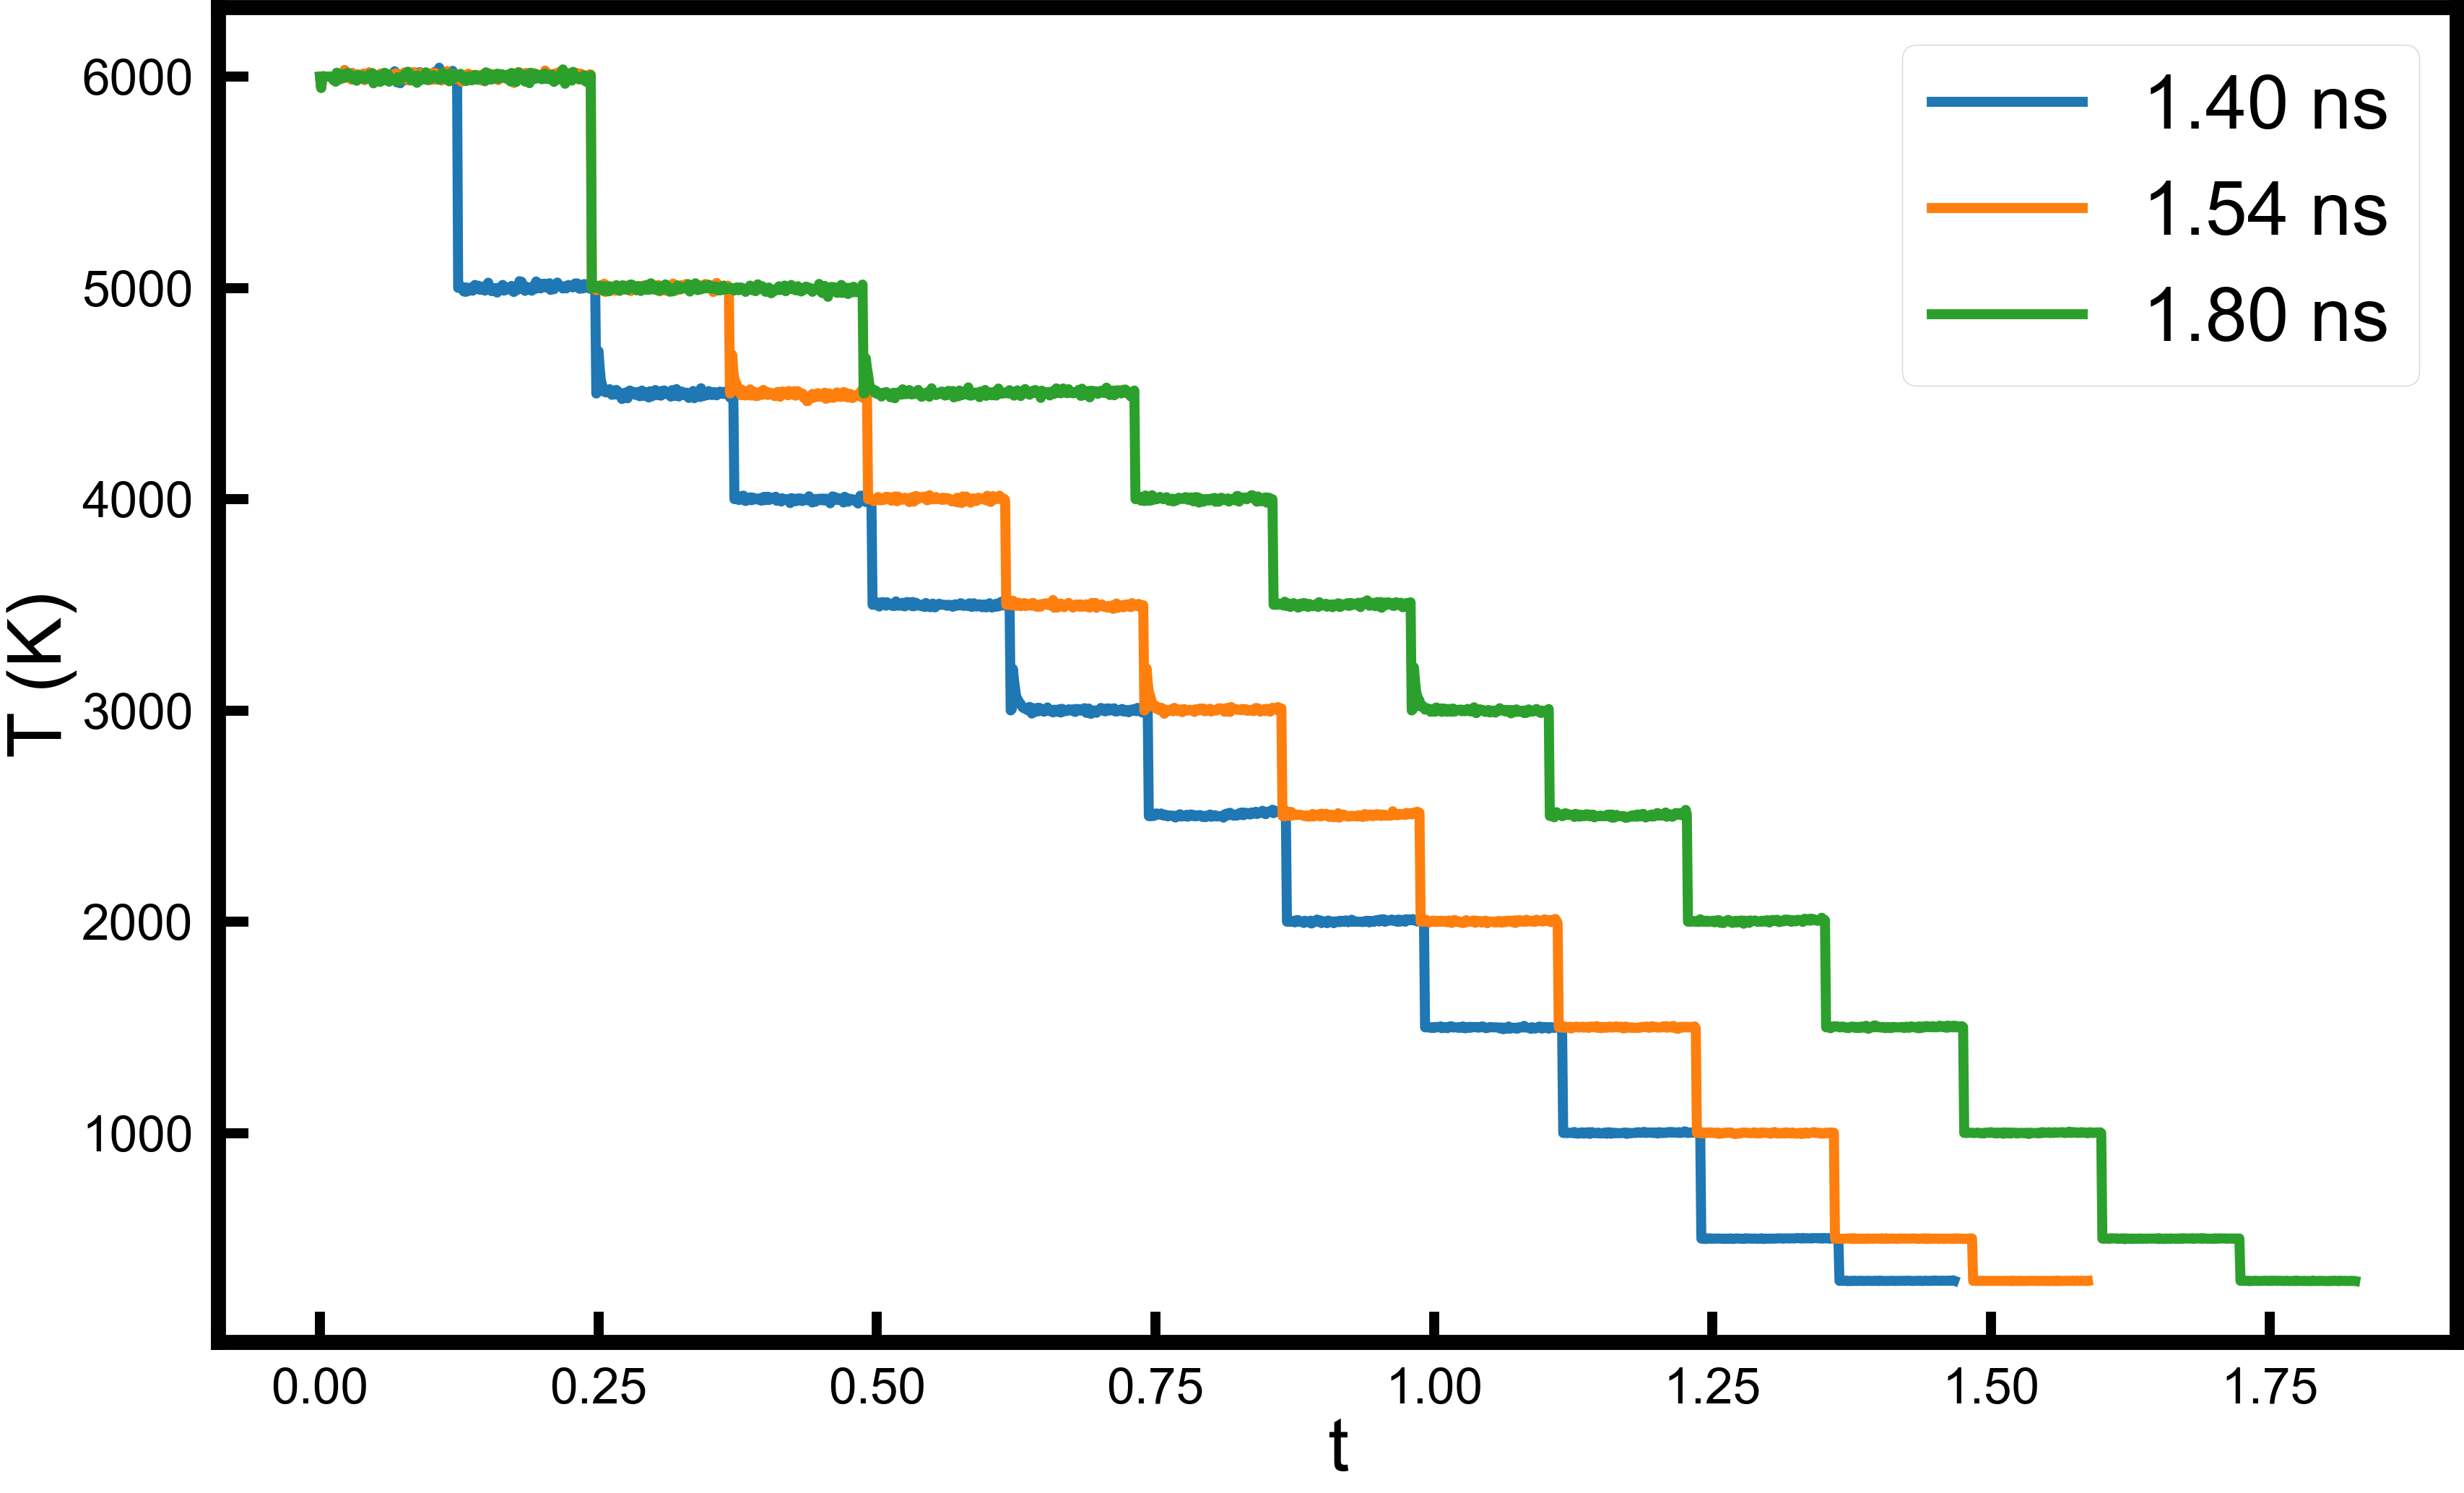

In [80]:
# Plot t vs T for different 

plt.plot([t*0.001 for t in range(len(MQ_1p4))], MQ_1p4[:,2], label='1.40 ns')
plt.plot([t*0.001 for t in range(len(MQ_1p54))], MQ_1p54[:,2], label='1.54 ns')
plt.plot([t*0.001 for t in range(len(MQ_1p80))], MQ_1p80[:,2], label='1.80 ns')

plt.xlabel("t")
plt.ylabel("T (K)")
plt.legend(loc='best')
plt.show()


In [81]:
PE_1p4 = get_PE("1p4ns")
PE_1p54 = get_PE("1p54ns")
PE_1p80 = get_PE("1p80ns")

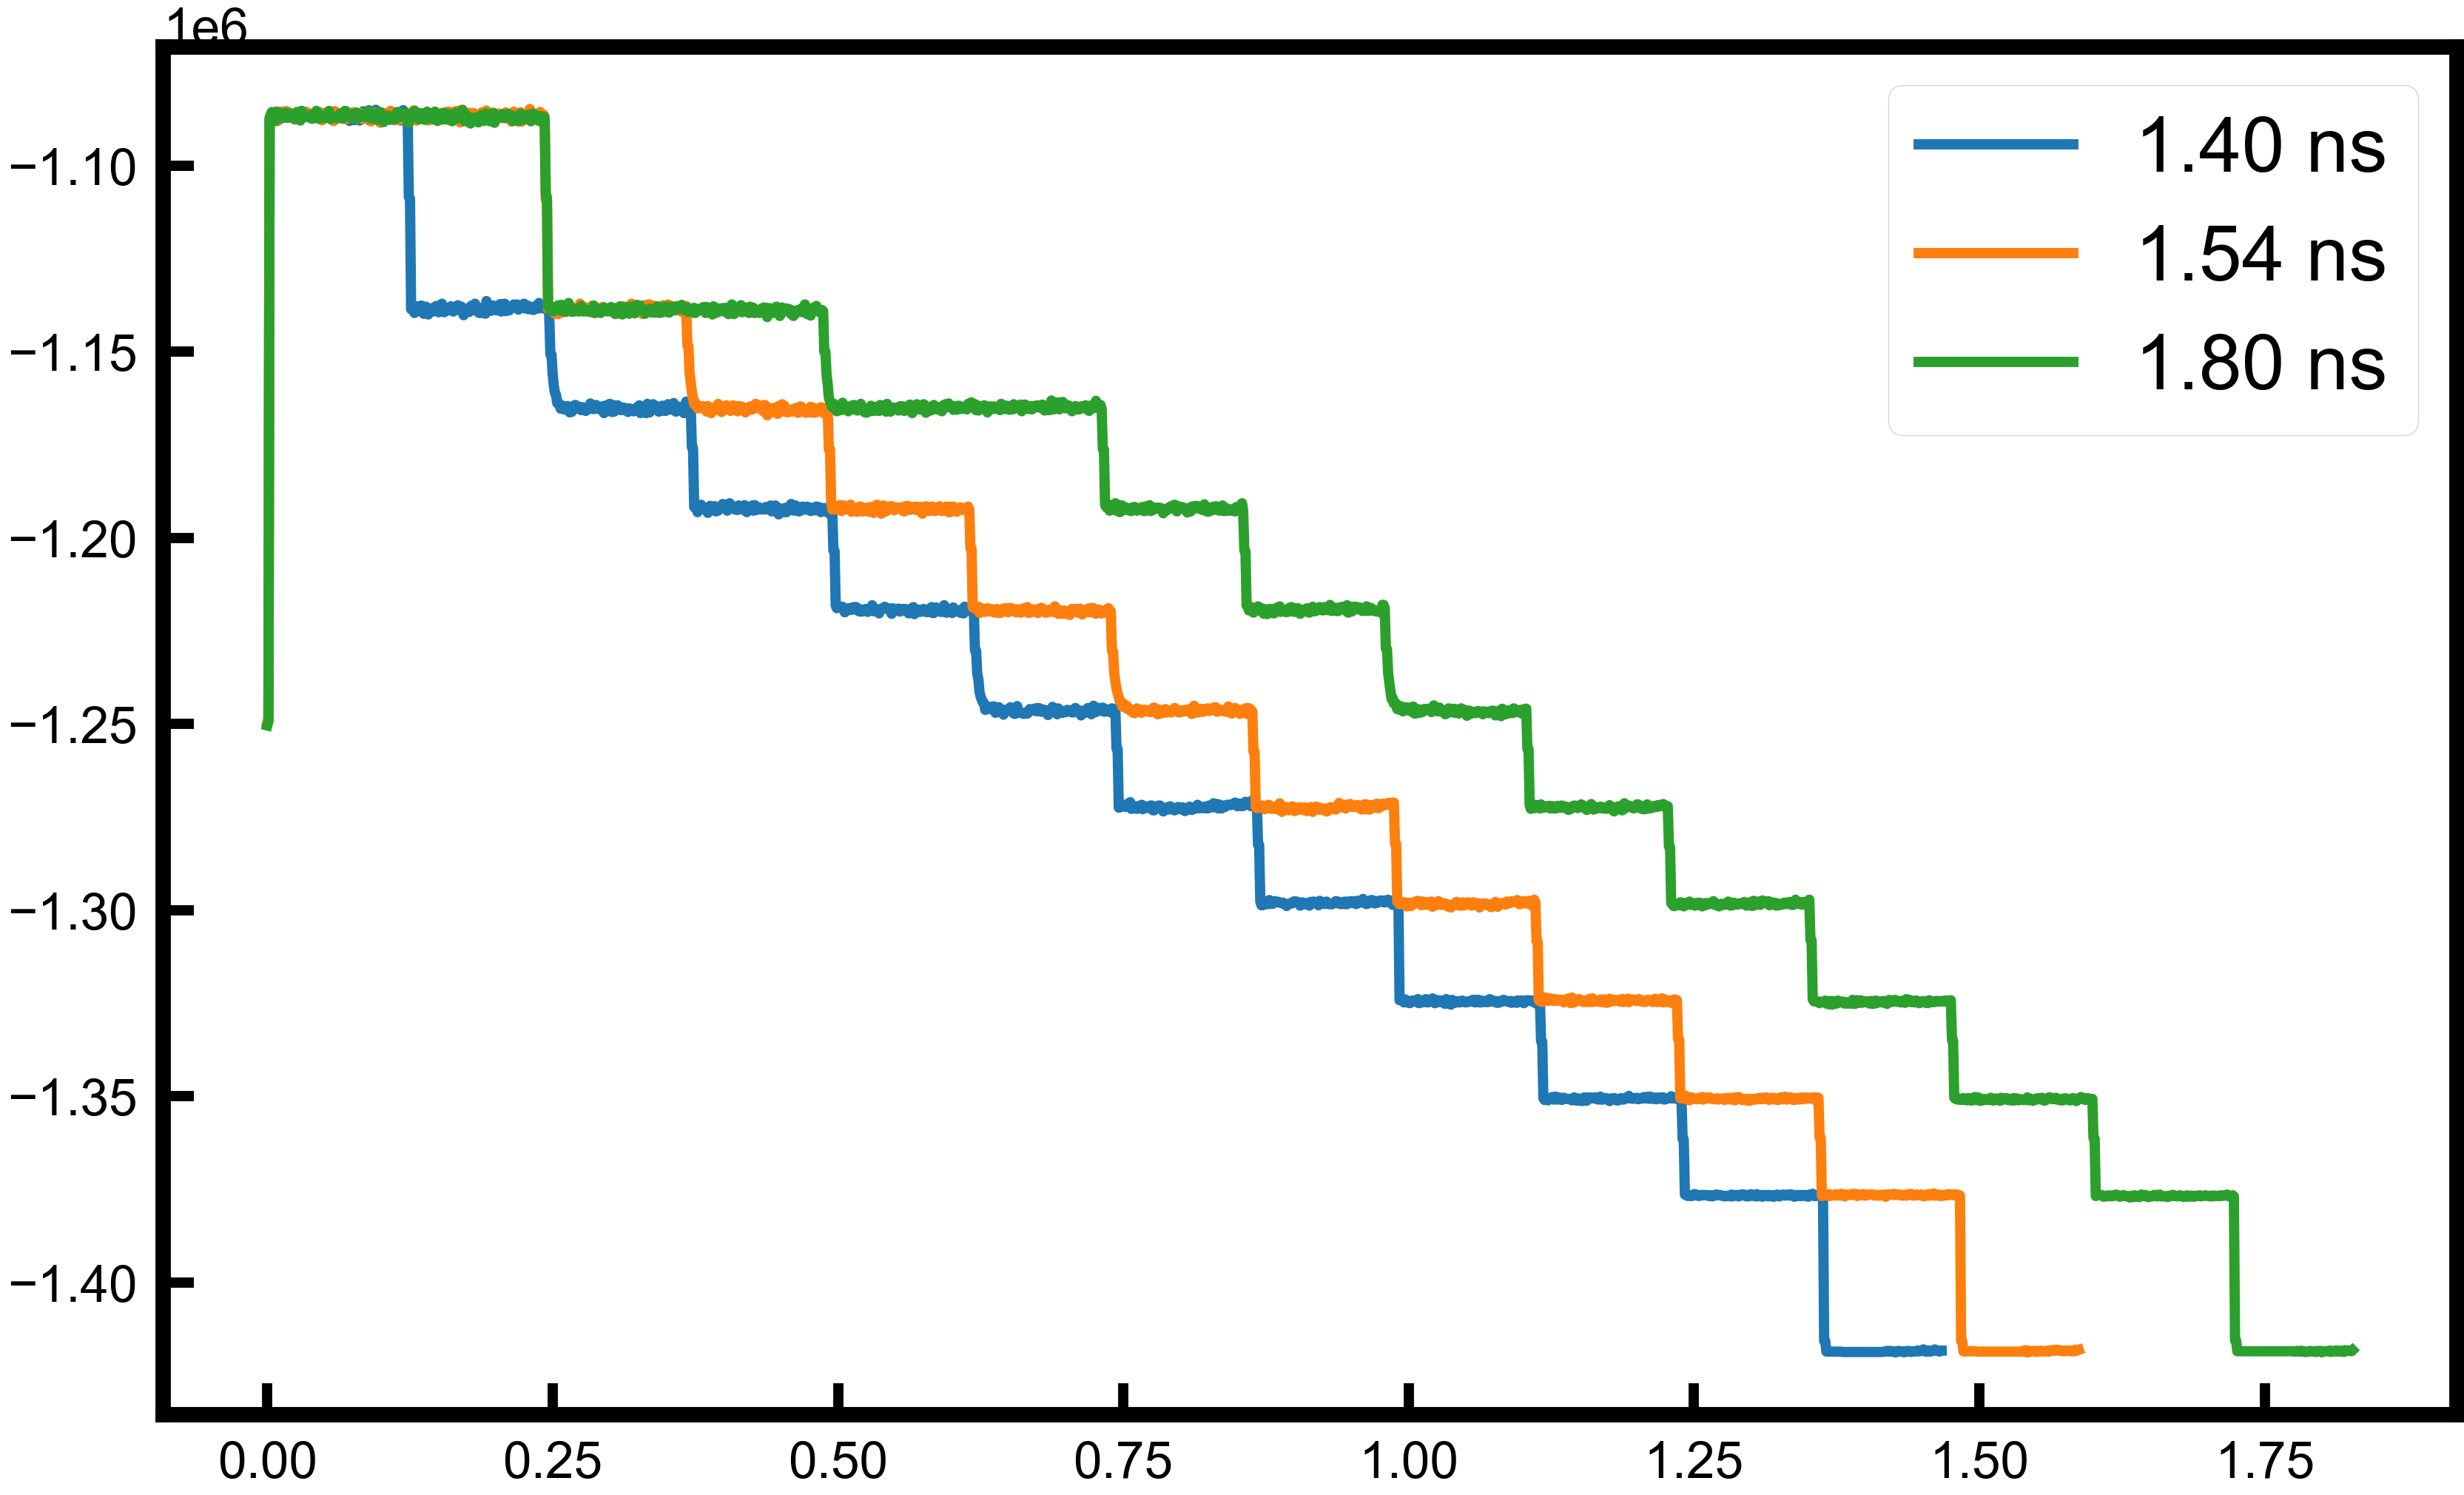

In [82]:
plt.plot([t*0.001 for t in range(len(PE_1p4))], PE_1p4[:,1], label='1.40 ns')
plt.plot([t*0.001 for t in range(len(PE_1p54))], PE_1p54[:,1], label='1.54 ns')
plt.plot([t*0.001 for t in range(len(PE_1p80))], PE_1p80[:,1], label='1.80 ns')

plt.legend(loc='best')
# plt.yscale('log')
plt.show()